### Importación de datos



In [138]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [139]:
import matplotlib.pyplot as plt

# Creamos un data frame donde guardaremos los datos a analizar de cada tienda
tabla_tiendas = pd.DataFrame(index = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Creamos una lista de tuplas para asignarle un color a cada tienda al graficar
colores_tienda : dict[str, str] = dict(zip(tabla_tiendas.index, ['green', 'red', 'blue', 'orange']))

tabla_tiendas

""
Tienda 1
Tienda 2
Tienda 3
Tienda 4


#1. Análisis de facturación



In [140]:
# Agregamos los ingresos de cada tienda a nuestro data frame para mayor organización
tabla_tiendas['Ingreso total'] : list = list(map(lambda x: x['Precio'].sum(), [tienda, tienda2, tienda3, tienda4]))

tabla_tiendas

,Ingreso total
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


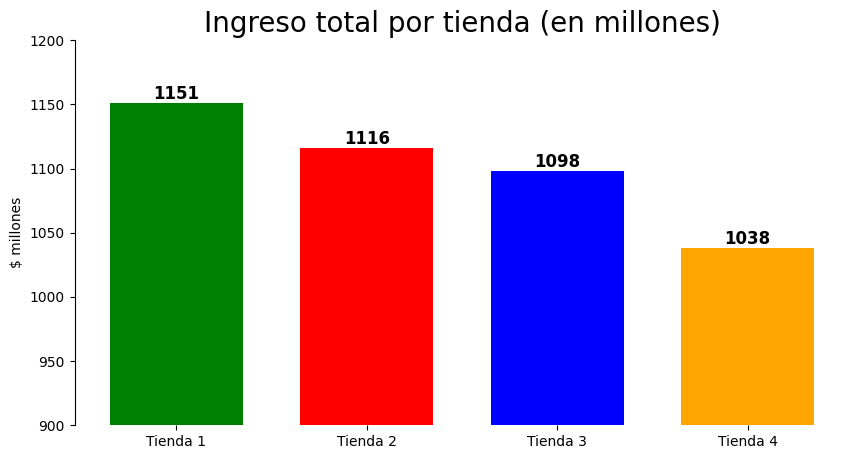

In [194]:
# Creamos una figura nueva para el grafico de los ingresos
fig1, ax1 = plt.subplots(figsize = (10, 5))

# Le ponemos un titulo al grafico y al eje y
ax1.set_title('Ingreso total por tienda (en millones)', fontsize= 20)
ax1.set_ylabel('$ millones')

# Para mayor legibilidad, dado que los ingresos llegan a mil millones, vamos a dividir
# los ingresos por un millon, asociado con cada tienda en una tupla
ingreso_por_tienda : list[tuple[str, float]] = list(zip(tabla_tiendas.index, list(map(lambda ingresos: ingresos / 1000000, tabla_tiendas['Ingreso total']))))

# Organizamos los ingresos de mayor a menor para mayor legibilidad del grafico
ingreso_por_tienda.sort(key = lambda ingreso: ingreso[1], reverse = True)

# Seleccionamos un grafico de barras, como el grafico que mostraremos
bars = ax1.bar(x = list(map(lambda x : x[0], ingreso_por_tienda)),
              width= 0.7,
              height = list(map(lambda x: x[1], ingreso_por_tienda)),
              color = [colores_tienda[tienda_nombre] for tienda_nombre in list(map(lambda x : x[0], ingreso_por_tienda))]
              )

# Le añadimos el valor de los ingresos arriba de cada barra
ax1.bar_label(bars, fontsize = 12, fontweight = 'bold', fmt = '%.f')

# Ajustamos el limite del eje y entre 900 y 1200 millones para
# apreciar más facilmente la diferencia entre las barras
ax1.set_ylim(900, 1200)

# Quitamos las lineas limitantes arriba y a la derecha para menor ruido
# visual
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Mostramos el grafico
fig1.show()

## Analisis de ingresos:
Despues de sumar los ingresos de cada tienda, y compararlos entre si, notamos que la **Tienda 4** es la que ha generado menos ingresos (1,038 millones) comparado con las otras 3 tiendas.

# 2. Ventas por categoría

In [183]:
# Agregamos a nuestro data frame las ventas por categoria de cada tienda
ventas_categorias_tienda1 : list[tuple[str,int]] = list(zip(list(tienda['Categoría del Producto'].value_counts().index), list(map(lambda x : int(x), list(tienda['Categoría del Producto'].value_counts().values)))))
ventas_categorias_tienda2 : list[tuple[str,int]] = list(zip(list(tienda2['Categoría del Producto'].value_counts().index), list(map(lambda x : int(x), list(tienda2['Categoría del Producto'].value_counts().values)))))
ventas_categorias_tienda3 : list[tuple[str,int]] = list(zip(list(tienda3['Categoría del Producto'].value_counts().index), list(map(lambda x : int(x), list(tienda3['Categoría del Producto'].value_counts().values)))))
ventas_categorias_tienda4 : list[tuple[str,int]] = list(zip(list(tienda4['Categoría del Producto'].value_counts().index), list(map(lambda x : int(x), list(tienda4['Categoría del Producto'].value_counts().values)))))

tabla_tiendas['Ventas por categoría'] : list = [ventas_categorias_tienda1, ventas_categorias_tienda2, ventas_categorias_tienda3, ventas_categorias_tienda4]
tabla_tiendas

,Ingreso total,Ventas por categoría
Tienda 1,1.150880e+09,"[(Muebles, 465), (Electrónicos, 448), (Juguete..."
Tienda 2,1.116344e+09,"[(Muebles, 442), (Electrónicos, 422), (Juguete..."
Tienda 3,1.098020e+09,"[(Muebles, 499), (Electrónicos, 451), (Juguete..."
Tienda 4,1.038376e+09,"[(Muebles, 480), (Electrónicos, 451), (Juguete..."


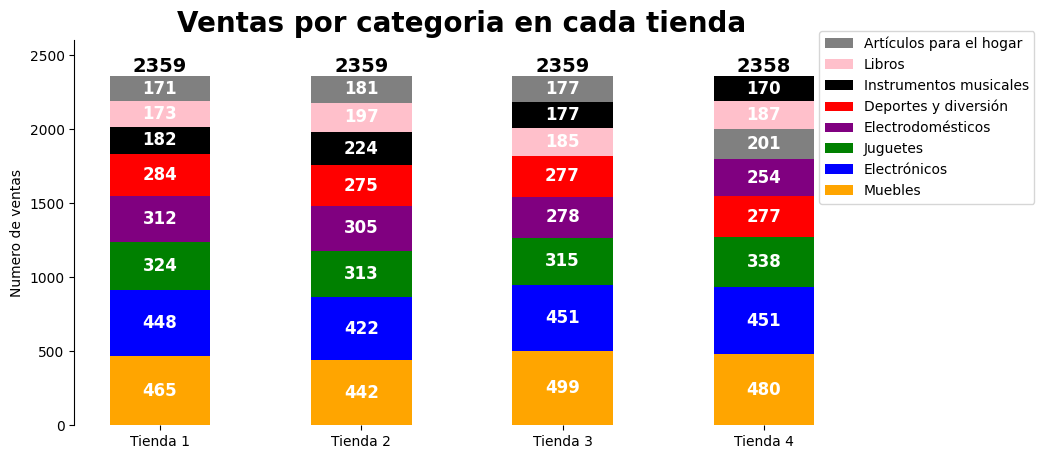

In [103]:
# Creamos una figura nueva
fig2, ax2 = plt.subplots(figsize = (10, 5))

# Le ponemos un titulo al grafico y al eje y
ax2.set_title('Ventas por categoria en cada tienda', fontsize= 20, fontweight = 'bold')
ax2.set_ylabel('Numero de ventas')

# Creamos una lista de colores para cada categoria al momento de graficar
colores : list[str] = ['orange', 'blue', 'green', 'purple', 'red', 'black', 'pink', 'gray']

# Obtenemos los nombres de las categorias
categorias_nombre : list = list(tabla_tiendas['Ventas por categoría'].value_counts().index[0])

categoria_colores : dict[str, str] = {}

# Asignamos un color a cada categoria
for categoria, color in zip(categorias_nombre, colores):
  categoria_colores[categoria[0]] : str = color

# Creamos un set que contendra la leyenda de cada categoria en el grafico
leyenda : set[str] = set()

# Recorremos cada tienda
for nombre_tienda in tabla_tiendas['Ventas por categoría'].index:
  # Cantidad de ventas en cada categoria
  acumulacion_ventas : int = 0

  # Recorremos las categorias y ventas por categoria segun cada tienda
  for categoria in tabla_tiendas['Ventas por categoría'][nombre_tienda]:
    # Si ya tenemos esta categoria en la leyenda, no la volvemos a agregar
    if leyenda.issuperset(set([categoria[0]])):
      stacked_bar = ax2.bar(nombre_tienda, categoria[1],  width= 0.5, bottom = acumulacion_ventas, color = categoria_colores[categoria[0]])
    # En caso contrario agregamos la categoria a la leyenda
    else:
      stacked_bar = ax2.bar(nombre_tienda, categoria[1], label = categoria[0],  width= 0.5, bottom = acumulacion_ventas, color = categoria_colores[categoria[0]])
      leyenda.add(categoria[0])

    # Le ponemos una etiqueta con la cantidad de ventas de esa categoria
    ax2.bar_label(stacked_bar, label_type = 'center', fontweight = 'bold', fontsize = 12, color = 'white')

    # Sumamos la cantidad de ventas de esta categoria
    acumulacion_ventas += categoria[1]

  # Al final de recorrer las categorias de un tienda, le ponemos una etiqueta de la
  # cantidad total de ventas que tuvo dicha tienda
  ax2.bar_label(stacked_bar, label_type = 'edge', fontweight = 'bold', fontsize = 14, color = 'black')

# Invertimos el orden de la leyenda para mejor legibilidad
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1], loc = 'center', bbox_to_anchor=(1.1, 0.8), fontsize = 10)

# Ajustamos el limite del eje y para tener más espacio
ax2.set_ylim(0, 2600)

# Quitamos las lineas limitantes arriba y a la derecha para menor ruido
# visual
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

fig2.show()

## Analisis de ventas por categoria:
En la grafica podemos notar que las 3 principales categorias que llegan a tener mayor cantidad de venta en las 4 tiendas, siempre son: **Muebles**, **Electronicos** y **Juguetes**, en ese orden.

# 3. Calificación promedio de la tienda


In [184]:
calificacion_tienda1 : float = sum(tienda['Calificación']) / len(tienda['Calificación'])
calificacion_tienda2 : float = sum(tienda2['Calificación']) / len(tienda2['Calificación'])
calificacion_tienda3 : float = sum(tienda3['Calificación']) / len(tienda3['Calificación'])
calificacion_tienda4 : float = sum(tienda4['Calificación']) / len(tienda4['Calificación'])

tabla_tiendas['Calificación'] : list = [calificacion_tienda1,
                                        calificacion_tienda2,
                                        calificacion_tienda3,
                                        calificacion_tienda4]

tabla_tiendas

,Ingreso total,Ventas por categoría,Calificación
Tienda 1,1.150880e+09,"[(Muebles, 465), (Electrónicos, 448), (Juguete...",3.976685
Tienda 2,1.116344e+09,"[(Muebles, 442), (Electrónicos, 422), (Juguete...",4.037304
Tienda 3,1.098020e+09,"[(Muebles, 499), (Electrónicos, 451), (Juguete...",4.048326
Tienda 4,1.038376e+09,"[(Muebles, 480), (Electrónicos, 451), (Juguete...",3.995759


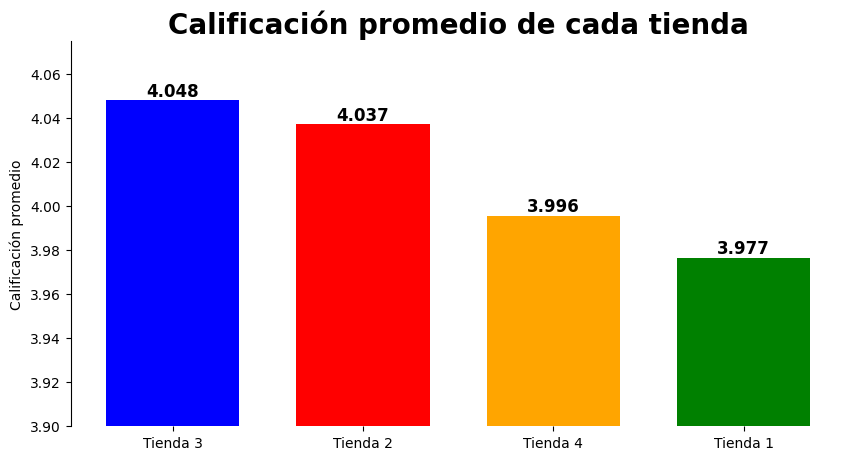

In [190]:
# Creamos una nueva figura
fig3, ax3 = plt.subplots(figsize = (10, 5))

# Le ponemos un titulo al grafico y al eje y
ax3.set_title('Calificación promedio de cada tienda', fontsize= 20, fontweight = 'bold')
ax3.set_ylabel('Calificación promedio')

# Obtenemos las calificaciones de cada tiempo en una lista de tuplas
calificaciones : list[tuple[str, float]] = list(zip(tabla_tiendas.index, tabla_tiendas['Calificación']))

# La organizamos
calificaciones.sort(key = lambda x: x[1], reverse = True)

# Seleccionamos un grafico de barras, como el grafico que mostraremos
bar_calificacion = ax3.bar(x = list(map(lambda x: x[0], calificaciones)),
                          width= 0.7,
                          height = list(map(lambda x: x[1], calificaciones)),
                          color = [colores_tienda[nombre_tienda] for nombre_tienda in list(map(lambda x: x[0], calificaciones))])

# Le añadimos el valor de cada barra
ax3.bar_label(bar_calificacion, fontsize = 12, fontweight = 'bold', fmt = '%.3f')

# Ajustamos el limite del eje y para tener notar la diferencia entre las barra
# más facilmente
ax3.set_ylim(3.9, 4.075)

# Quitamos las lineas limitantes arriba, a la derecha y abajo para menor ruido
# visual
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

fig3.show()

## Analisis de calificación de las tiendas:
Vemos en la grafica, que en promedio, los clientes se sienten más satisfechos con el servicio ofrecido con la **Tienda 3**(4.048), comparado con la **Tienda 1**(3.977), que aunque el peor promedio en calificación, la diferencia no es muy grande.

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda